# MBA em Ciência de Dados
### Universidade de São Paulo, São Carlos, Brasil

**Disciplina:** Aprendizado de Máquina

**Professor Reponsavel:** Prof. Dr. André Carlos Ponce de Leon Ferreira de Carvalho
📧 andre@icmc.usp.br
🌐 [linkedin](https://www.linkedin.com/in/andr%C3%A9-carlos-ponce-de-leon-f-de-carvalho-151bb26/)
🔗 [site](http://www.cemeai.icmc.usp.br/component/teamdisplay/108)

# Case: Classificação de Câncer por meio de microRNA


**Autor:** Edesio Alcobaça
📧 edesio@usp.br
🌐 [linkedin](https://www.linkedin.com/in/ealcobaca/)
🔗 [site](https://ealcobaca.github.io/)

## Descrição & Objetivo

**Descrição dos Dados:** Os dados foram coletados do [The Cancer Genome Atlas]() (TCGA), que é um programa internacional e de referência mundial de caracterização de mais de 33 tipos de câncer. Os dados são reais e foram devidamente anonimizados. Cada linha representa a amostra retirada de uma pessoa. As colunas são os tipos de microRNA e cada entrada representa a intensidade com que aquele microRNA está expresso. Os valores de expressão variam entre $[0, \infty]$. Valores próximos a zero indicam pouca expressão enquanto que o contrário indica uma alta expressão. Os dados também apresentam rótulos (veja o atributo class) sendo TP (primary solid tumor) indicando tumor e NT (normal tissue).


**Objetivo:** Construir um modelo para predizer quando uma pessoa tem câncer dado um exame de sequenciamento do RNA.

## Leitura dos Dados

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

np.random.seed(0)
# plt.rcParams["figure.figsize"] = (15,15)
# sns.set(rc={'figure.figsize':(150, 150)})



In [24]:
df = pd.read_csv("brca_mirnaseq.csv", sep=';', header=0, decimal=',')
df

,hsa.let.7a.1,hsa.let.7a.2,hsa.let.7a.3,hsa.let.7b,hsa.let.7c,hsa.let.7d,hsa.let.7e,hsa.let.7f.1,hsa.let.7f.2,hsa.let.7g,...,hsa.mir.941.1,hsa.mir.942,hsa.mir.943,hsa.mir.944,hsa.mir.95,hsa.mir.96,hsa.mir.98,hsa.mir.99a,hsa.mir.99b,class
0,8962.996542,17779.575039,9075.200383,24749.898857,341.298400,406.164781,1470.179650,14.716795,3627.642977,387.417272,...,0.0,5.530515,0.187475,2.062226,4.124452,119.984057,53.992826,130.201449,46548.939810,TP
1,7739.739862,15524.941906,7713.626636,23374.640471,801.487258,513.297924,560.962427,20.922042,6557.093894,350.955461,...,0.0,8.180047,0.000000,0.629234,1.258469,60.249189,86.047798,236.434808,12644.149725,TP
2,8260.612670,16497.981335,8355.342958,10957.355911,635.811272,620.351816,2694.331127,39.799878,11830.760394,600.725980,...,0.0,3.618171,0.000000,0.767491,1.644623,97.252043,117.645369,191.434123,33083.456616,TP
3,9056.241254,18075.168478,9097.666150,26017.522731,2919.348415,334.245155,1322.434475,17.866463,6438.725384,354.957604,...,0.0,3.478426,0.000000,3.478426,1.739213,72.572624,41.583007,1046.690127,24067.232290,TP
4,10897.303665,21822.338727,10963.956320,22204.253575,3313.009950,350.615669,1711.886682,22.541895,8246.117280,333.425447,...,0.0,2.108235,0.000000,1.135203,0.810860,19.947145,34.380445,1081.037952,25715.275426,TP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,10628.975280,21125.108661,10585.686678,23396.813364,3892.051211,367.141461,1484.663795,23.402901,10570.535667,571.680109,...,0.0,1.217492,0.000000,0.405831,1.217492,79.813361,57.627952,1100.883277,16338.471420,TP
838,16799.785282,33603.904432,16883.338223,20731.006597,5263.331356,201.676038,2173.283559,36.888271,18227.341203,870.301142,...,0.0,5.341744,0.000000,3.124416,2.318115,16.629958,57.348159,1919.601107,14080.736733,TP
839,13120.807001,26337.935723,13229.425112,18796.895124,6581.549565,375.598820,2547.029500,28.505268,16838.042944,778.398745,...,0.0,1.863089,0.000000,0.558927,0.931545,41.919511,54.215901,1310.124456,17072.605898,TP
840,7979.531224,16006.280243,8106.687917,20462.010937,4040.296936,295.594442,962.166120,23.885025,7625.121634,428.411748,...,0.0,2.070956,0.000000,2.209020,1.656765,55.225491,53.016472,1120.939408,18696.866174,TP


## Análise Exploratória dos Dados

In [25]:
df['class'].value_counts()

TP    755
NT     87
Name: class, dtype: int64

In [26]:
df.describe()

,hsa.let.7a.1,hsa.let.7a.2,hsa.let.7a.3,hsa.let.7b,hsa.let.7c,hsa.let.7d,hsa.let.7e,hsa.let.7f.1,hsa.let.7f.2,hsa.let.7g,...,hsa.mir.940,hsa.mir.941.1,hsa.mir.942,hsa.mir.943,hsa.mir.944,hsa.mir.95,hsa.mir.96,hsa.mir.98,hsa.mir.99a,hsa.mir.99b
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,...,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,9218.938921,18432.504585,9289.250466,26606.604836,3152.699471,558.321269,1289.570177,24.359962,8687.461926,610.223836,...,5.902975,0.003737,6.446279,0.061018,2.320737,3.150482,38.307053,63.746405,1034.572148,44369.112203
std,4843.796136,9704.187427,4858.691217,16745.347957,3238.003201,346.883205,763.056055,12.490091,6052.615278,317.854963,...,8.325681,0.049274,9.541682,0.172214,6.527536,4.287594,33.791795,40.145314,1117.491608,32754.290751
min,1294.149164,2599.981125,1319.952907,1817.920354,148.795934,79.783216,161.181457,2.439034,653.474578,88.614573,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.374223,18.400719,3475.079227
25%,5902.143848,11741.467528,5933.706564,14580.357100,1276.700850,330.638301,809.867504,16.441786,4648.822942,410.859815,...,1.378098,0.000000,2.464140,0.000000,0.373238,1.201951,14.906921,39.913493,387.430475,22769.094433
50%,8016.628565,16040.589880,8103.783439,23097.825936,2352.902327,481.342371,1101.403395,21.890340,7019.157941,532.277053,...,3.192098,0.000000,4.127957,0.000000,1.036215,2.235731,29.634884,52.993693,710.026124,35594.670263
75%,11236.887034,22538.594950,11289.595988,34373.185504,3971.192192,681.931022,1619.864372,29.395515,10926.448322,724.277709,...,7.159431,0.000000,7.551755,0.000000,2.345941,4.030888,51.258145,75.993914,1242.434228,53462.034662
max,45101.697434,90233.655610,45095.490102,144706.427973,59677.212349,3370.036117,11617.011618,121.408006,80780.055188,3342.745045,...,91.996543,0.909391,184.185656,1.757516,122.685820,93.402785,259.127121,399.078716,15689.499524,248074.178531


## Estabelecendo um Baseline Comparativo

- Métrica justa -> Balanced Accuracy
- Stratify -> Mesma proporção dos labels entre teste e treino
- Cross Validation -> Estabilidade do modelo em relação a diferentes splits.

In [27]:
X = df.drop(["class"], axis=1)
y = df['class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)

In [29]:
reg_log = LogisticRegression(random_state=0)

cv_reg_log = cross_val_score(reg_log, X_train, y_train, cv=10, scoring='balanced_accuracy')

/Users/joaopedromattos/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joaopedromattos/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [30]:
mean_cv_reg_log, std_cv_reg_log = np.mean(cv_reg_log), np.std(cv_reg_log)

print(f"Mean CV score: {mean_cv_reg_log}")
print(f"Std CV score: {std_cv_reg_log}")

Mean CV score: 0.9160057709586011
Std CV score: 0.07640811487563921


## Modelagem

In [31]:
knn_pipeline = Pipeline([('min_max_scaler', MinMaxScaler()),
                         ('skb', SelectKBest(chi2, k=10)),
                         ('knn', KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance'))])

cv_knn = cross_val_score(knn_pipeline, X_train, y_train, cv=10, scoring='balanced_accuracy')

In [32]:
mean_cv_knn, std_cv_knn = np.mean(cv_knn), np.std(cv_knn)

print(f"Mean CV score: {mean_cv_knn}")
print(f"Std CV score: {std_cv_knn}")

Mean CV score: 0.960062893081761
Std CV score: 0.04623924863570132


## Avaliação Experimental

In [36]:
# resultados da cross-validacao

df_result_cv = pd.DataFrame(
    [cv_reg_log, cv_knn],
    index=["baseline", "knn"]
).T

df_result_cv


,baseline,knn
0,0.731132,0.990566
1,1.000000,1.000000
2,1.000000,1.000000
3,0.971698,0.878931
4,0.907233,0.916667
5,0.907233,0.907233
6,0.916667,0.990566
7,0.897799,0.916667
8,0.857143,1.000000
9,0.971154,1.000000


<Figure size 1000x1000 with 0 Axes>

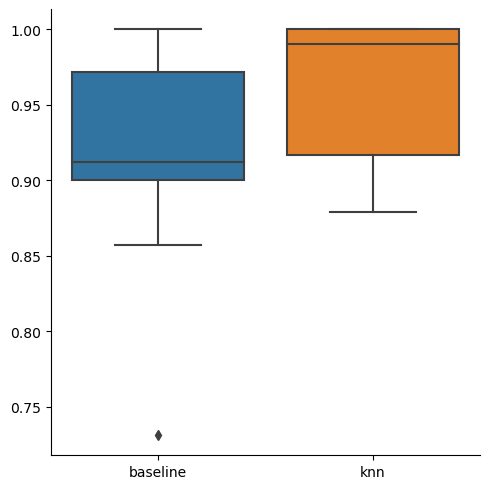

In [39]:
plt.figure(figsize=(10,10))

sns.catplot(data=df_result_cv, kind='box');

## Avaliação Final - Conjunto Teste

In [40]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                ('skb',
                 SelectKBest(score_func=<function chi2 at 0x7fcd008f6af0>)),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', weights='distance'))])

In [41]:
y_pred = knn_pipeline.predict(X_test)

In [43]:
balanced_accuracy_score(y_test, y_pred)

0.9401050491358861

## Confusion matrix

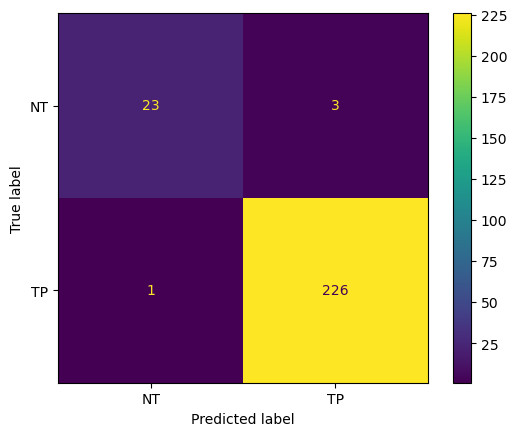

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn_pipeline, X_test, y_test)

<font size="1"> © <a href="https://github.com/ealcobaca">ealcobaca</a> *(2022)* </font>